# Multiple Linear Regression

## Introduction
In this lecture, you'll be introduced to the multiple linear regression model. We'll start with an introductory example using linear regression, which you've seen before, to act as a segue into multiple linear regression. We'll conclude this lecture by looking at a real data example.

## Objectives
You will be able to:
* Interpret the parameters of a multiple regression

## From simple to multiple linear regression

You have previously learned about linear regression models. In these models, what you try to do is fit a linear relationship between two variables. Let's refresh our memory with the example below. Here, we are trying to find a relationship between seniority and monthly income. It is definitely reasonable to assume that, on average, people with more seniority have a higher income than people who are newer to the job market and have less experience. A potential relationship could look like the plot below. The monthly income is shown in 1000 USD.

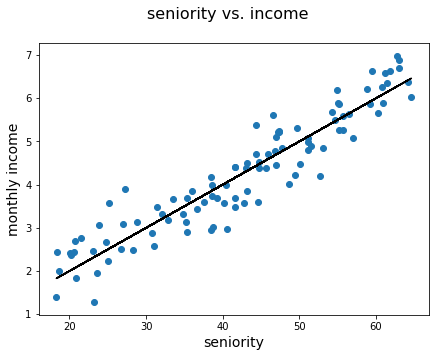

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1234)
sen = np.random.uniform(18, 65, 100)
income = np.random.normal((sen/10), 0.5)
sen = sen.reshape(-1, 1)

fig = plt.figure(figsize=(7, 5))
fig.suptitle('seniority vs. income', fontsize=16)
plt.scatter(sen, income)
plt.plot(sen, sen/10, c='black')
plt.xlabel('seniority', fontsize=14)
plt.ylabel('monthly income', fontsize=14)
plt.show()

Here, seniority is the independent variable, and monthly income is the target variable.

Of course, you know that seniority is not the only factor that drives income. Other factors that can play a role are, among others, the number of hours worked, years of education, and the city of employment. Now, you could create simple linear regression models for each of these factors and monthly outcome as a target, but more interestingly, you can also create a model where all these potential predictors serve as independent variables at once. How does this work? Let's start with an example with two predictors. As a general expression for our linear model, we had that $\hat Y = bX + a$. Applied to this example, this would boil down to:

$\text{estimated monthly income} = slope * seniority + intercept $


adding in years of education as a predictor, you can extend this model to:

$\text{estimated monthly income} = slope\_sen * seniority + slope\_ed * years\_of\_education  + intercept $

What exactly does that look like?

<img src="images/multiple_reg.png" width="500">

As we have two predictors here, the simple line is replaced by a **plane**. Our $slope\_sen$ represents the slope in the direction of the axis associated with seniority, our $slope\_ed$ represents the slope in the direction of the axis associated with years of education. 

And it obviously doesn't stop here! We can add as many predictors as we like. What is important to note, however, is that for models with more than two predictors visualizing a multiple linear model becomes very difficult and even impossible! Still, they are used all the time, as linear models of all sorts are extensively helpful in many fields!

When thinking of lines and slopes statistically, slope parameters associated with a particular predictor $x_i$ are often denoted by $\beta_i$. Extending this example mathematically, you would write a multiple linear regression model as follows:

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \hat\beta_n x_n $$ 

where $n$ is the number of predictors, $\beta_0$ is the intercept, and $\hat y$ is the so-called "fitted line" or the predicted value associated with the dependent variable.


## Summary

Congratulations! You have gained an initial understanding of a multiple linear regression model. To illustrate the usage of the multiple linear regression model, we'll be using the auto-mpg dataset which contains information on the technical specifications of a variety of cars. In the labs, you'll be practicing your newly gained knowledge using the Boston Housing data again.